<a href="https://colab.research.google.com/github/DataBoss62/BASICS-TUTORIAL/blob/main/PoliceStopSearch_FinalProject_HemantPatel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Define the problem domain

In [2]:
# Dataset contains details of individuals stopped and searched by London Police and whether as a result of this a criminal action was the outcome.

# 0   Type                                      Type of search (e.g. Person search, Vehicle search or both Person and vehicle search)
# 1   Date                                      When search happened (Date and time stamp)
# 2   Part of a policing operation            
# 3   Policing operation                        
# 4   Latitude                                  Latitude of place of search
# 5   Longitude                                 Longitude of place of search
# 6   Gender                                    Male or Female
# 7   Age range                                 (18-24, 25-34 or over 34)
# 8   Self-defined ethnicity                    Range of ethnicities , 30 off(e.g Asian-Asian British Chinese, etc)
# 9   Officer-defined ethnicity                 Range of ethnicities , 4 (Black, White, Asian, other)
# 10  Legislation                               relevant legislation reference, 8 off (e.g. Misuse of Drugs Act 1971 (section 23))
# 11  Object of search                          items searched (e,g, firearms, controlled drugs)
# 12  Outcome                                   Eventual outcome, (e.g. Suspect arrested, Nothing found - no further action)
# 13  Outcome linked to object of search        True or False
# 14  Removal of more than just outer clothing  True or False

### Q. Identify candidate questions for your machine learning project

In [3]:
# What if any is the correlation of the above features to the Outcome?
# Can you machine learn a model such that given a specific age, self-defined ethnicity, type of search , object of search, the Outcome can be predicted to be True if criminal or False if not

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [ ]:
# Reading in the data
# import all the libraries and modules I'll be needing
import pandas as pd # data processing
import numpy as np # maths
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
# ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

sns.set()



! pip install azureml-core
! pip install azureml-dataprep

# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '284fa756-9f27-4173-8d91-0a7afbd7e46d'
resource_group = 'MachineLearningServices'
workspace_name = 'HemantML'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='Police-stop-hem')
data = dataset.to_pandas_dataframe()

### Q. Generate a descriptive statistics report for the columns in your dataset

In [5]:
data.describe()



,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
count,4679,4679,35,35,2398,2398,4620,4394,4423,4415,4635,4587,4411,4169,4602
unique,4,4447,1,1,483,488,4,5,35,5,9,12,16,3,3
top,Person search,Date,Part of a policing operation,Policing operation,51.527286,-0.215815,Male,18-24,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
freq,3325,35,35,35,126,126,4161,1642,988,2326,2244,2220,1773,2734,4440


In [6]:
# can see there are very few values for columns 3,4,5 and 6. These should be dropped. 4679 rows and 15 columns
print(data.shape)
data.head(5)


(4679, 15)


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2016-10-01T13:16:00+00:00,None,None,None,None,Male,18-24,Black or Black British - African (B2),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Offender given drugs possession warning,True,False
1,Person search,2016-10-01T22:30:00+00:00,None,None,None,None,Male,25-34,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,None,False
2,Person and Vehicle search,2016-10-02T00:15:00+00:00,None,None,None,None,Male,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect summonsed to court,False,False
3,Person and Vehicle search,2016-10-02T00:15:00+00:00,None,None,None,None,Female,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,None,False
4,Person and Vehicle search,2016-10-04T13:05:00+00:00,None,None,None,None,Male,18-24,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect arrested,True,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4679 entries, 0 to 4678
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Type                                      4679 non-null   object
 1   Date                                      4679 non-null   object
 2   Part of a policing operation              35 non-null     object
 3   Policing operation                        35 non-null     object
 4   Latitude                                  2398 non-null   object
 5   Longitude                                 2398 non-null   object
 6   Gender                                    4620 non-null   object
 7   Age range                                 4394 non-null   object
 8   Self-defined ethnicity                    4423 non-null   object
 9   Officer-defined ethnicity                 4415 non-null   object
 10  Legislation                               4635 n

In [8]:
# cardinality - count of unique values in a column
for cname in data.columns:
  print(cname + " : " + str(data[cname].value_counts().count()))

Type : 4
Date : 4447
Part of a policing operation : 1
Policing operation : 1
Latitude : 483
Longitude : 488
Gender : 4
Age range : 5
Self-defined ethnicity : 35
Officer-defined ethnicity : 5
Legislation : 9
Object of search : 12
Outcome : 16
Outcome linked to object of search : 3
Removal of more than just outer clothing : 3


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [9]:
# there are very few values for columns 3(Part of a policing operation ),4(Policing operation),5(Latitude) and 6(Longitude).All are MCAR These should be dropped. 4679 rows and 15 columns
# 'Outcome linked to object of search' data can be inferred from the 'Outcome' column and can be classed as MAR. As numbers are relatively small, we can remove these nulls.
#  

df1 = data.dropna(how = 'all')   #first drop all rows that contain no data
df2 = df1.drop(['Part of a policing operation'], axis = 1)
df2 = df2.drop(['Policing operation'], axis = 1)
df2 = df2.drop(['Latitude'], axis = 1)
df2 = df2.drop(['Longitude'], axis = 1)
df2.head()

#df2 = data.loc[:, ['Type', 'Date', 'Gender', 'Age range', 'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation', 'Object of search', 'Outcome', 'Outcome linked to object of search', ]]

,Type,Date,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2016-10-01T13:16:00+00:00,Male,18-24,Black or Black British - African (B2),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Offender given drugs possession warning,True,False
1,Person search,2016-10-01T22:30:00+00:00,Male,25-34,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,None,False
2,Person and Vehicle search,2016-10-02T00:15:00+00:00,Male,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect summonsed to court,False,False
3,Person and Vehicle search,2016-10-02T00:15:00+00:00,Female,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,None,False
4,Person and Vehicle search,2016-10-04T13:05:00+00:00,Male,18-24,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect arrested,True,False


In [10]:
# checking the amount of null values in the data set
df2.isnull().sum()

Type                                          0
Date                                          0
Gender                                       59
Age range                                   285
Self-defined ethnicity                      256
Officer-defined ethnicity                   264
Legislation                                  44
Object of search                             92
Outcome                                     268
Outcome linked to object of search          510
Removal of more than just outer clothing     77
dtype: int64

In [11]:
# fill Outcome column with Falses in place of nulls
y_missing = df2['Outcome'].fillna(False)
df2['Outcome']= y_missing
df2.isnull().sum()

Type                                          0
Date                                          0
Gender                                       59
Age range                                   285
Self-defined ethnicity                      256
Officer-defined ethnicity                   264
Legislation                                  44
Object of search                             92
Outcome                                       0
Outcome linked to object of search          510
Removal of more than just outer clothing     77
dtype: int64

In [12]:
# ignoring the 'date' column, Create a list of all needed columns called 'features'. Define x as 'all the feature columns', and y as the 'outcome' column. 
df2.columns

features = ['Type', 'Gender', 'Age range',
       'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation',
       'Object of search', 'Outcome linked to object of search',
       'Removal of more than just outer clothing']

x = df2.loc[:, features]
y = df2.loc[:, 'Outcome']
x.dropna(inplace=True)     # delete all rows with null values , as they are relatively small in number
y = y.iloc[x.index]
print(x.shape)
print(y.shape)   # x and y have the same reduced number of rows 3789  from  4679
x.head()     

(3789, 9)
(3789,)


,Type,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,Male,18-24,Black or Black British - African (B2),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,True,False
2,Person and Vehicle search,Male,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,False,False
4,Person and Vehicle search,Male,18-24,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,True,False
7,Person search,Female,over 34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,True,False
8,Person search,Male,25-34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,False,False


In [13]:
# check for any nulls
print(x.isnull().sum())
print(y.isnull().sum())

Type                                        0
Gender                                      0
Age range                                   0
Self-defined ethnicity                      0
Officer-defined ethnicity                   0
Legislation                                 0
Object of search                            0
Outcome linked to object of search          0
Removal of more than just outer clothing    0
dtype: int64
0


In [25]:
# convert the text values in the columns to numbers so that we can run a model
from sklearn.preprocessing import LabelEncoder 

for col in x.columns:
    le = LabelEncoder()
    x[col]= le.fit_transform(x[col])
    
x.head()

,Type,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome linked to object of search,Removal of more than just outer clothing
0,1,2,1,9,4,4,3,2,0
2,0,2,1,9,1,4,3,0,0
4,0,2,1,29,4,4,3,2,0
7,1,0,4,32,4,5,11,2,0
8,1,2,2,32,4,5,11,0,0


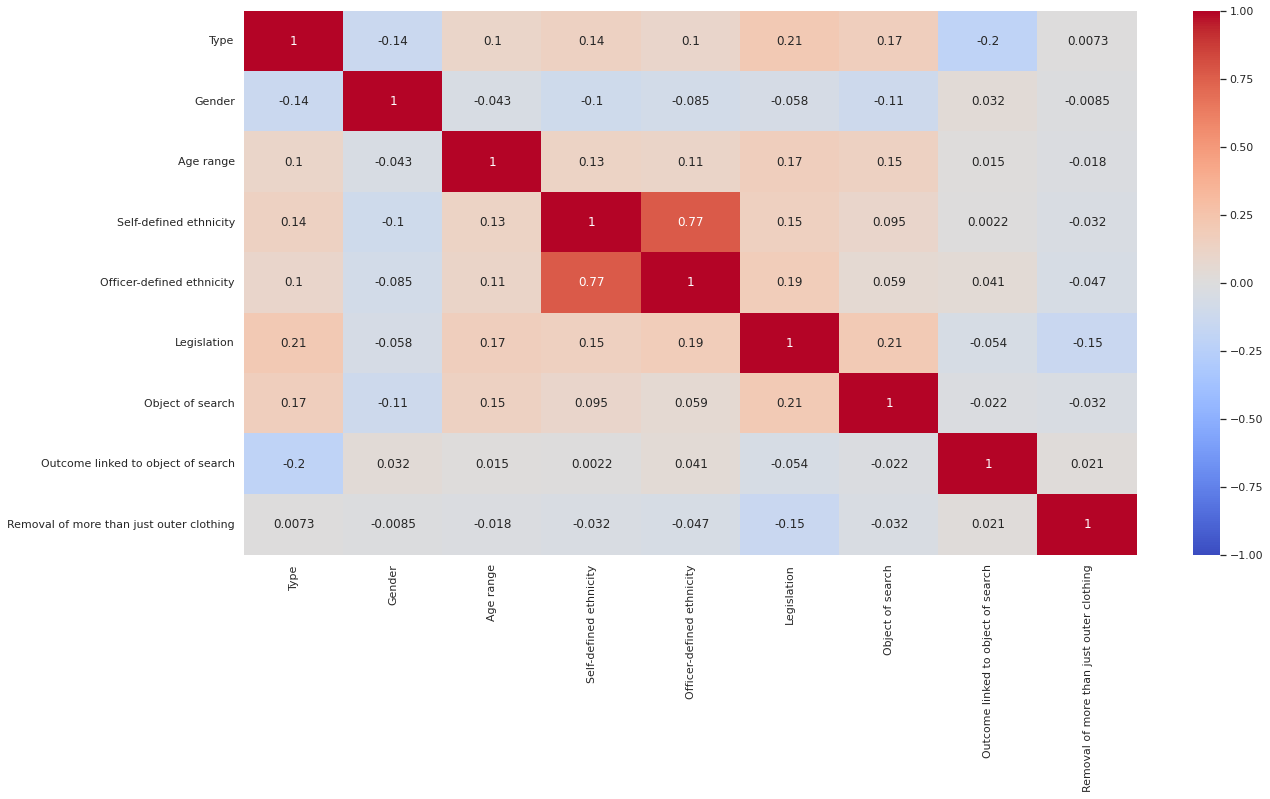

In [34]:
# Now let's look at a heat map to see the correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
corr = x.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.show()

In [16]:
# heatmap shows that overall correlation is weak, indicating deeper data is required

import plotly.express as px

px.histogram(y, x='Outcome')
# plot shows , you can bundle 'Outcome' into 'False' key combining 'No further action ..' and 'Nothing found ..' and 'True'key of all others

In [17]:
# Using the lambda function simplify y into two classes 1 or 0 , depending on whether Outcome is True (if in the first 2 key labels ) or False (in any other key label)

all_label_values = list(dict(y.value_counts()).keys())
print(all_label_values)
logic = lambda x: 0 if (x == all_label_values[0] or x== all_label_values[1]) else 1
y2 = y.map(logic)
y2[:10]

['A no further action disposal', 'Nothing found - no further action', 'Arrest', 'Suspect arrested', False, 'Khat or Cannabis warning', 'Offender given drugs possession warning', 'Local resolution', 'Community resolution', 'Outcome', 'Suspect summonsed to court', 'Penalty Notice for Disorder', 'Offender given penalty notice', 'Article found - Detailed outcome unavailable', 'Caution (simple or conditional)', 'Summons / charged by post', 'Offender cautioned']


0     1
2     1
4     1
7     1
8     1
9     1
13    1
14    1
17    1
18    1
Name: Outcome, dtype: int64

In [18]:
# Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y2,
                             test_size=0.2, random_state=42)

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [19]:
# import models from sklearn under classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


ntree1, ntree2 = 50,100
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
for algo in [RandomForestClassifier(n_estimators=ntree1), RandomForestClassifier(n_estimators=ntree2), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearSVC()]:
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  print(classification_report(ytest, predictions))
  print(accuracy_score(predictions, ytest))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       433
           1       0.83      0.76      0.79       325

    accuracy                           0.83       758
   macro avg       0.83      0.82      0.83       758
weighted avg       0.83      0.83      0.83       758

0.8311345646437994
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       433
           1       0.83      0.76      0.79       325

    accuracy                           0.83       758
   macro avg       0.83      0.82      0.82       758
weighted avg       0.83      0.83      0.83       758

0.8271767810026385
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       433
           1       0.86      0.73      0.79       325

    accuracy                           0.83       758
   macro avg       0.84      0.82      0.82       758
weighted avg       0.83      0.83   

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [20]:
# Note the third model GaussianNB gave the highest accuracy of 0.8311

# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [21]:
# We have selected GaussianNb as our best model. Package this model for deployment into Azure
#from sklearn.naive_bayes import GaussianNB
final_model = GaussianNB()
final_model.fit(xtrain,ytrain)
p = final_model.predict(xtest)
print(accuracy_score(p, ytest))

0.8311345646437994


# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [22]:
from joblib import dump
dump(final_model, 'PoliceStopSearch-HP.joblib') 

['PoliceStopSearch-HP.joblib']

In [ ]:
# here is the deployed Python code from Azure for the final model 

import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
}

body = str.encode(json.dumps(data))

url = 'http://6a45b70d-5e63-4158-b396-c80405b28d45.eastus.azurecontainer.io/score'
api_key = '' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(error.read().decode("utf8", 'ignore'))